In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import librosa

In [26]:
SR = 48000

In [27]:
sig, _ = librosa.load("dataset/gtr/07_Gtr_G_3.wav", mono=True, sr=SR)

In [28]:
sig = sig[:SR]

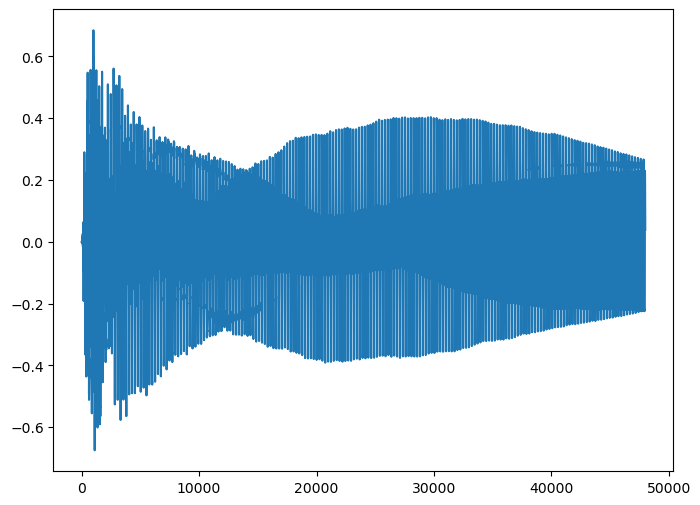

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(sig)
plt.show()

(257, 188)


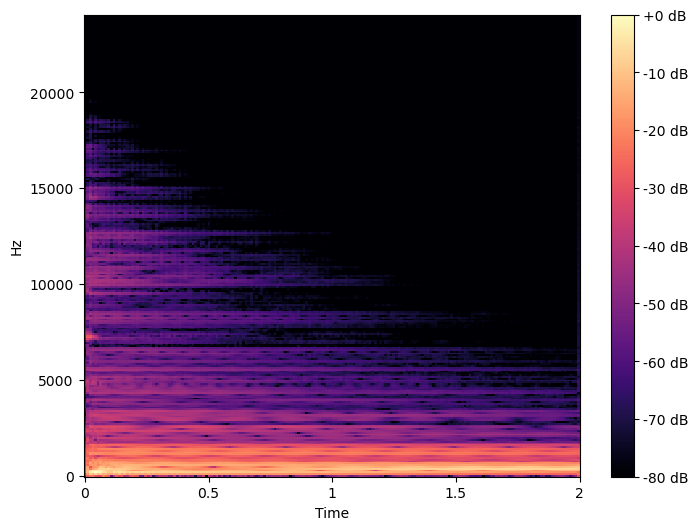

In [30]:
stft = librosa.stft(sig, n_fft=512, hop_length=256)
print(stft.shape)
D = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

fig = plt.figure(figsize=(8, 6))
img = librosa.display.specshow(D, y_axis="linear", x_axis="time", sr=SR)
fig.colorbar(img, format="%+2.f dB")
plt.show()

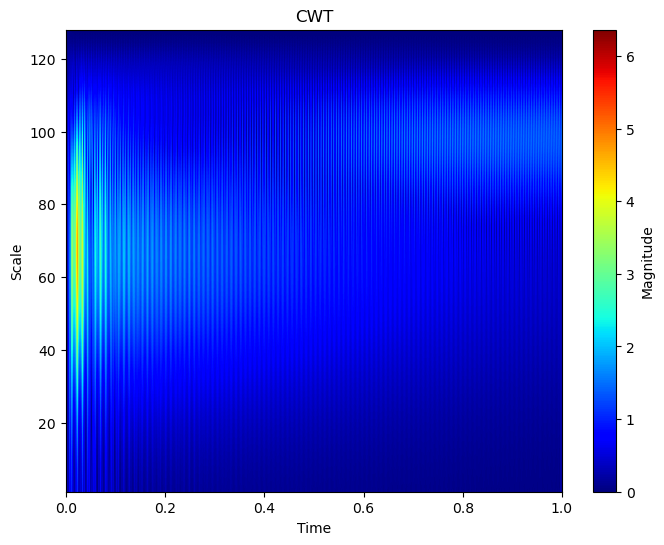

In [31]:
coefficients, frequencies = pywt.cwt(sig,
                                     scales=np.arange(1, 128),
                                     wavelet="mexh")

plt.figure(figsize=(8, 6))
plt.imshow(np.abs(coefficients), aspect="auto",
           cmap="jet", extent=[0, 1, 1, 128])
plt.colorbar(label="Magnitude")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title("CWT")
plt.show()

Shape of wavelet transform:  (255, 48000)


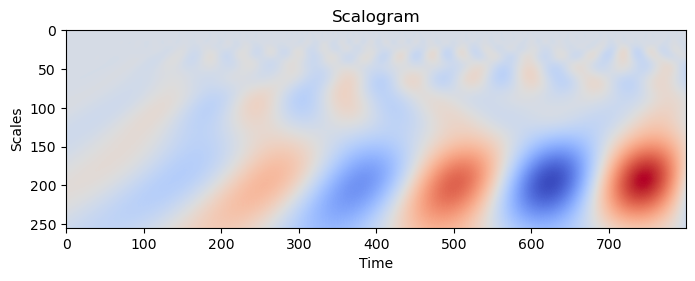

In [41]:
wavelet = "morl"  # wavelet type: morlet
widths = np.arange(1, 256)  # scales for morlet wavelet
# print("These are the scales that we are using: ", widths)
dt = 1/SR  # timestep difference

# Get frequencies corresponding to scales
frequencies = pywt.scale2frequency(wavelet, widths) / dt
# print("These are the frequencies that are associated with the scales: ", frequencies)

# Compute continuous wavelet transform of the audio numpy array
wavelet_coeffs, freqs = pywt.cwt(
    sig, widths, wavelet=wavelet, sampling_period=dt)
print("Shape of wavelet transform: ", wavelet_coeffs.shape)

# Display the scalogram. We will display a small part of scalogram because the length of scalogram is too big.
plt.figure(figsize=(8, 6))
plt.imshow(wavelet_coeffs[:, :800], cmap="coolwarm")
plt.xlabel("Time")
plt.ylabel("Scales")
# plt.yticks(widths[0::11])
plt.title("Scalogram")
plt.show()

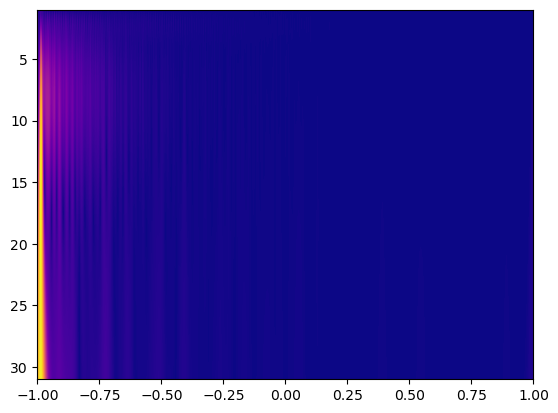

In [39]:
from scipy import signal

widths = np.arange(1, 512)  # scales for morlet wavelet
# the second parameter is where we are selecting a mother wavelet and the widths defines how many alterations on the mother wavelet needs to be performed to analyse the signal from different frequency resolutions, you should read more about them.
cwtmatr = signal.cwt(sig, signal.morlet, widths)
plt.imshow(abs(cwtmatr), extent=[-1, 1, 31, 1], cmap="plasma", 
           aspect="auto",
           vmax=abs(cwtmatr).max(),
           vmin=-abs(cwtmatr).min())  # finally we plot the scalogram
plt.show()